In [1]:
import numpy as np
import pandas as pd

import math
from random import shuffle
import random
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

### Classification

In [2]:
# function to generate data points for family car example
def generateCarTypeData(gnPoints):
    
    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df


In [3]:
my_df = generateCarTypeData(gnPoints=40)
#my_df

A scatter plot of data points

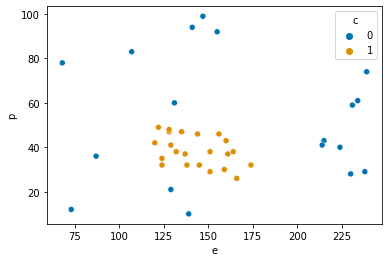

In [4]:
#plt.scatter(my_df.e, my_df.p, marker='o');
sns.scatterplot(x="e", y="p", hue="c", data=my_df, palette="colorblind")

In [5]:
# get the min price of a family car from the data set my_df
my_df[my_df['c']==1]['p'].min()

26

In [6]:
# get the max price of a NON-family car that is smaller than minimum price of a family car
min_price = my_df[my_df['c']==1]['p'].min()
my_df[(my_df['c']==0) & (my_df['p'] < min_price)]['p'].max()

21

$\color{red}{\text{Hint:}}$ Implement a function that returns min/max price/engine power values that define a rectangle classifier

In [10]:
# from 2D data, get the range values associated with a family car
def getRange_familyCar(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    return min_price, max_price, min_engine, max_engine
    

$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define the LARGEST rectangle classifier

In [3]:
class Foo:
    def __init__(self, f, b, u, l, r):
        self.f = f

        self.b = b
        self.u = u
        self.l = l
        self.r = r

        self.b1 = b
        self.u1 = u
        self.l1 = l
        self.r1 = r

        self.bottoms = self.f[(self.f['p'] < self.b) & (self.f['c'] == 0)].sort_values(['p'], ascending=False)[
            'p'].values
        self.uppers = self.f[(self.f['p'] > self.u) & (self.f['c'] == 0)].sort_values(['p'], ascending=True)['p'].values
        self.lefts = self.f[(self.f['e'] < self.l) & (self.f['c'] == 0)].sort_values(['e'], ascending=False)['e'].values
        self.rights = self.f[(self.f['e'] > self.r) & (self.f['c'] == 0)].sort_values(['e'], ascending=True)['e'].values

    def plot_rectangle_s(self):
        plt.figure()
        plt.plot([self.l1, self.r1], [self.b1, self.b1], color='r')
        plt.plot([self.l1, self.r1], [self.u1, self.u1], color='r')
        plt.plot([self.l1, self.l1], [self.b1, self.u1], color='r')
        plt.plot([self.r1, self.r1], [self.b1, self.u1], color='r')
        plt.scatter(self.f[self.f['c'] == 1]['e'], self.f[self.f['c'] == 1]['p'], color='r')
        plt.scatter(self.f[self.f['c'] == 0]['e'], self.f[self.f['c'] == 0]['p'], color='b')
        plt.show()

    def plot_rectangle(self):
        plt.figure()
        plt.plot([self.l, self.r], [self.b, self.b], color='r')
        plt.plot([self.l, self.r], [self.u, self.u], color='r')
        plt.plot([self.l, self.l], [self.b, self.u], color='r')
        plt.plot([self.r, self.r], [self.b, self.u], color='r')
        plt.scatter(self.f[self.f['c'] == 1]['e'], self.f[self.f['c'] == 1]['p'], color='r')
        plt.scatter(self.f[self.f['c'] == 0]['e'], self.f[self.f['c'] == 0]['p'], color='b')
        plt.show()

    def find_new_bottom(self, i):
        if i >= len(self.bottoms):
            return 0
        tmp = self.bottoms[i]
        if self.f[(self.f['c'] == 0) & ((self.f['p'] < self.u1) & (self.f['p'] > tmp)) &
                  ((self.f['e'] < self.r1) & (self.f['e'] > self.l1))].shape[0] == 0:
            self.b1 = tmp
            return 1
        else:
            return 0

    def find_new_upper(self, i):
        if i >= len(self.uppers):
            return 0
        tmp = self.uppers[i]
        if self.f[(self.f['c'] == 0) & ((self.f['p'] > self.b1) & (self.f['p'] < tmp)) &
                  ((self.f['e'] < self.r1) & (self.f['e'] > self.l1))].shape[0] == 0:
            self.u1 = tmp
            return 1
        else:
            return 0

    def find_new_left(self, i):
        if i >= len(self.lefts):
            return 0
        tmp = self.lefts[i]
        if self.f[(self.f['c'] == 0) & ((self.f['p'] < self.u1) & (self.f['p'] > self.b1)) &
                  ((self.f['e'] < self.r1) & (self.f['e'] > tmp))].shape[0] == 0:
            self.l1 = tmp
            return 1
        else:
            return 0

    def find_new_right(self, i):
        if i >= len(self.rights):
            return 0
        tmp = self.rights[i]
        if self.f[(self.f['c'] == 0) & ((self.f['p'] < self.u1) & (self.f['p'] > self.b1)) &
                  ((self.f['e'] < tmp) & (self.f['e'] > self.l1))].shape[0] == 0:
            self.r1 = tmp
            return 1
        else:
            return 0

    def greedy_search(self):
        c1, c2, c3, c4 = 0, 0, 0, 0
        pst, cur = -1, 0
        while pst != cur:
            c1 += self.find_new_bottom(c1)
            c2 += self.find_new_upper(c2)
            c3 += self.find_new_left(c3)
            c4 += self.find_new_right(c4)
            pst = cur
            cur = c1 + c2 + c3 + c4
        return self.b1, self.u1, self.l1, self.r1

def getRange_familyCar_large(gdf):
    bottom, upper, left, right = getRange_familyCar(my_df)
    foo = Foo(my_df, bottom, upper, left, right)
    min_price, max_price, min_engine, max_engine = foo.greedy_search()
    return min_price, max_price, min_engine, max_engine

$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define a medium (between smallest and largest) rectangle classifier

In [8]:
def getRange_familyCar_medium(gdf):
    min_price = 0
    max_price = 0
    min_engine = 0
    max_engine = 0
    
    min_p_s, max_p_s, min_e_s, max_e_s = getRange_familyCar(gdf)
    min_p_l, max_p_l, min_e_l, max_e_l = getRange_familyCar_large(gdf)
    
    min_price = (min_p_s + min_p_l) /2
    max_price = (max_p_s + max_p_l) /2
    min_engine = (min_e_s + min_e_l) /2
    max_engine = (max_e_s + max_e_l) /2
    
    return min_price, max_price, min_engine, max_engine

In [11]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

rectangle 27 49 120 179
rectangle 15 55 103 182
rectangle 21.0 52.0 111.5 180.5


In [11]:
def classify_instance_byRectangle(min_price, max_price, min_engine, max_engine, gdf_instance):
    if(min_engine<gdf_instance.e<max_engine and min_price<gdf_instance.p<max_price):
        return 1
    else:
        return 0

In [12]:
# first row of the data set
my_df.iloc[0]

e    135
p     47
c      1
Name: 0, dtype: int64

In [13]:
classify_instance_byRectangle(25, 46, 120, 179, my_df.iloc[0])

0

$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a circle classifier (obtained through data points that encapsulate family cars in the data set)

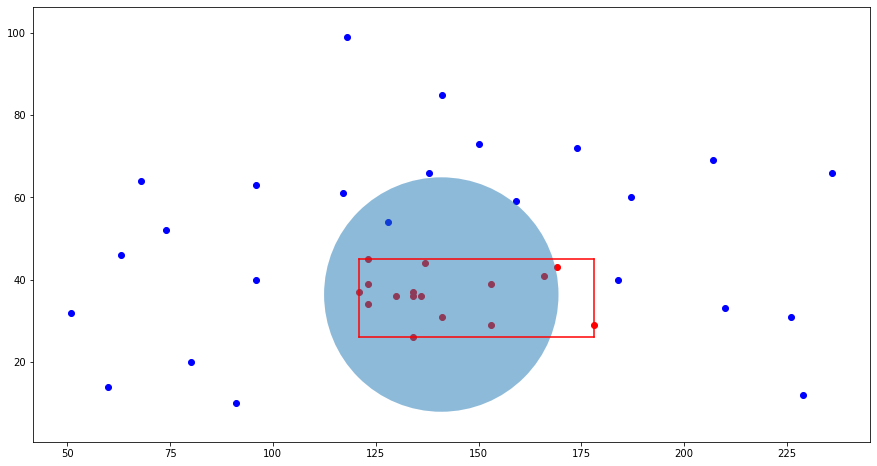

In [14]:
from sklearn.cluster import *
from matplotlib.patches import Ellipse, Circle
import numpy as np
import pandas as pd

import math
from random import shuffle
import random
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

# function to generate data points for family car example
def generateCarTypeData(gnPoints):
    
    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df

# from 2D data, get the range values associated with a family car
def getRange_familyCar(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    return min_price, max_price, min_engine, max_engine

def classify_instance_byCircle(min_price, max_price, min_engine, max_engine, gdf_instance):
    
    if True:
        return 1
    else:
        return 0
    

my_df = generateCarTypeData(gnPoints=40)
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot([min_e, max_e], [min_p, min_p], color='r')
ax.plot([min_e, max_e], [max_p, max_p], color='r')
ax.plot([min_e, min_e], [min_p, max_p], color='r')
ax.plot([max_e, max_e], [min_p, max_p], color='r')
ax.scatter(my_df[my_df['c'] == 1]['e'], my_df[my_df['c'] == 1]['p'], color='r')
ax.scatter(my_df[my_df['c'] == 0]['e'], my_df[my_df['c'] == 0]['p'], color='b')


clf = KMeans(n_clusters=1, init='random', n_init=10, max_iter=300, tol=0.0001, 
             verbose=0, random_state=0, copy_x=True, algorithm='lloyd').fit(my_df[my_df['c']==1])
cx = (min_e+max_e)/2
cy = (min_p+max_p)/2
r1 = (max_e-min_e)/2
r2 = (max_p-min_p)/2
cir1 = Circle(xy = (clf.cluster_centers_[0][0], clf.cluster_centers_[0][1]), radius=max(r1,r2), alpha=0.5)
ax.add_patch(cir1)
ax.axis('equal')

plt.show()

$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a ellipsoid classifier (obtained through data points that encapsulate family cars in the data set)

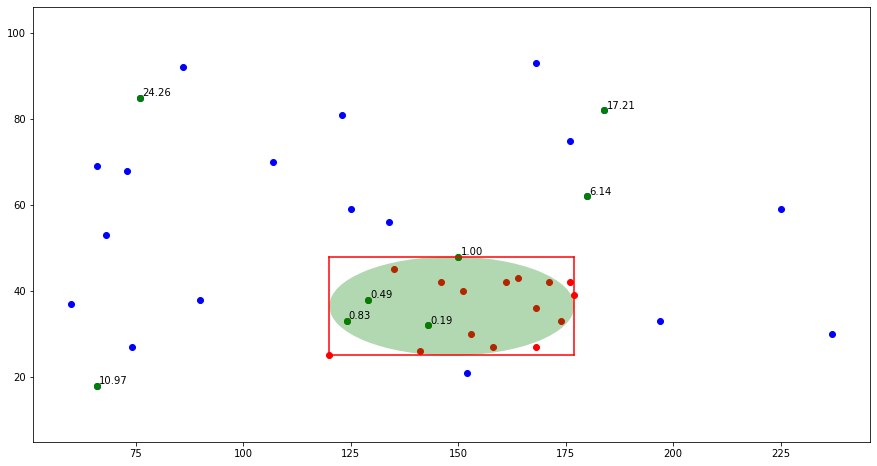

0

In [15]:
from sklearn.cluster import *
from matplotlib.patches import Ellipse, Circle
import numpy as np
import pandas as pd

import math
from random import shuffle
import random
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

# function to generate data points for family car example
def generateCarTypeData(gnPoints):
    
    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df

# from 2D data, get the range values associated with a family car
def getRange_familyCar(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    return min_price, max_price, min_engine, max_engine

def classify_instance_byEllipsoid(min_price, max_price, min_engine, max_engine, gdf_instance):
    cx = (min_engine + max_engine) / 2
    cy = (min_price + max_price) / 2
    r1 = (max_engine - min_engine) / 2
    r2 = (max_price - min_price) / 2
    val = (x-cx)**2/r1**2+(y-cy)**2/r2**2
    if val<=1:
        return 1
    else:
        return 0


my_df = generateCarTypeData(gnPoints=40)
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot([min_e, max_e], [min_p, min_p], color='r')
ax.plot([min_e, max_e], [max_p, max_p], color='r')
ax.plot([min_e, min_e], [min_p, max_p], color='r')
ax.plot([max_e, max_e], [min_p, max_p], color='r')
ax.scatter(my_df[my_df['c'] == 1]['e'], my_df[my_df['c'] == 1]['p'], color='r')
ax.scatter(my_df[my_df['c'] == 0]['e'], my_df[my_df['c'] == 0]['p'], color='b')

cx = (min_e+max_e)/2
cy = (min_p+max_p)/2
r1 = (max_e-min_e)/2
r2 = (max_p-min_p)/2
ell1 = Ellipse(xy = (cx, cy), width = r1*2, height = r2*2, angle = 0.0, facecolor='green', alpha=0.3)
ax.add_patch(ell1)
ax.axis('equal')

for i in range(int(my_df.shape[0]/5)):
    x = my_df.loc[i, 'e']
    y = my_df.loc[i, 'p']
    txt = "%.2f" % ((x-cx)**2/r1**2+(y-cy)**2/r2**2)
    ax.scatter(x , y, color='g')
    ax.annotate(txt, xy = (x, y), xytext = (x+0.5, y+0.5))

plt.show()

# classify_instance_byEllipsoid(min_p, max_p, min_e, max_e, my_df.iloc[0])

In [16]:
test_df = generateCarTypeData(gnPoints=20) # you might want to try different test set sizes

In [17]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 26 49 120 174
[0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1]
[0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
d_accuracy 0.75


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_large() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byCircle() function is used for classifying the instances in the test set

$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byEllipsoid() function is used for classifying the instances in the test set

### Regression

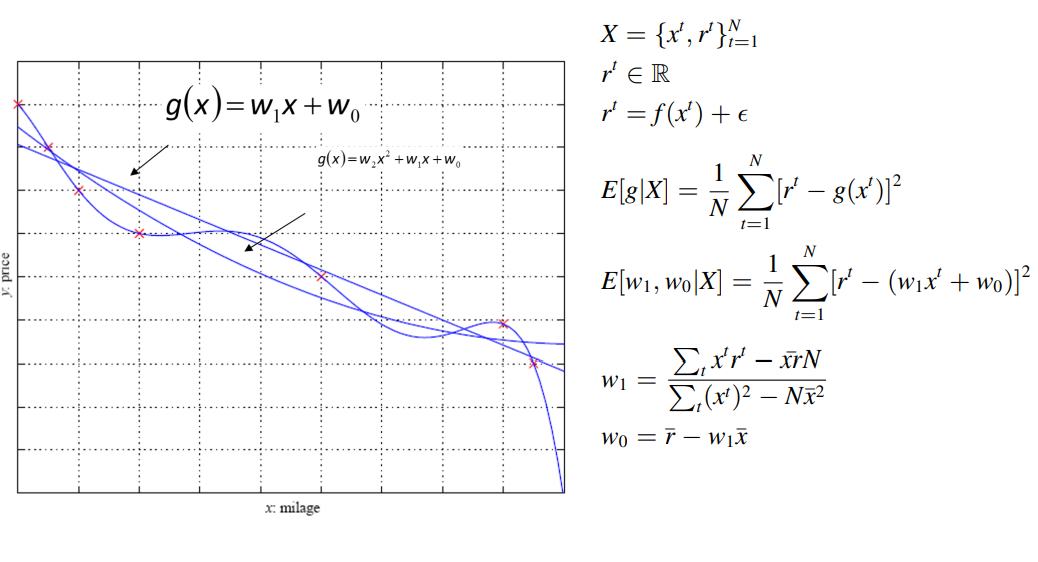

$\color{red}{\text{Question:}}$ Given a set of actual labels (gLabels) and predicted labels (gPredictedLabels), implement a function that returns RMSE

In [18]:
def getRMSE(glabels, gPredictedLabels):
    RMSE = 0
    return RMSE

A function that generates data points according to the equation (r = mx + b + noise) where m=2.25, b = 6, and noise$\sim N(0,1.21)$

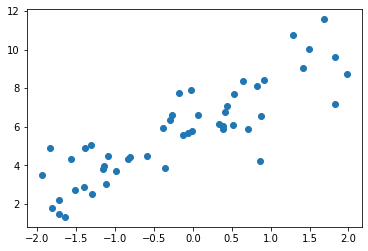

In [19]:
n_points = 50

b = 6 # intercept
m = 2.25 # slope
noise_mean = 0.0
noise_var = 1.21

X = []
r = []
for i in range(n_points):
    #rnd_num = random.random()
    rnd_num = np.random.uniform(-2, 2)
    X.append(rnd_num)
    r.append(b + m*rnd_num + np.random.normal(loc=noise_mean, scale=noise_var))
    #r.append(b + m *rnd_num)

plt.scatter(X, r, marker='o');

$\color{red}{\text{Question:}}$ Calculate $w_0$ and $w_1$ values in linear regression equation $r = w_0+w_1*x$ based on the closed form expressions in the lecture notes.

In [20]:
def cal_coefficents(x,r,n):
  pass


$\color{red}{\text{Question:}}$ Report the error with the calculated w_1 and w_0.

Hint: Use getRMSE() function that you have implemented

In [22]:
# Report the error with the calculated w_1 and w_0


$\color{red}{\text{Question:}}$ Plot the data points along with the fitted line.

Hint: Use mathplotlib library's plot function

In [24]:
# Plot the data points along with the fitted line


using library functions for linear regression

In [25]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

# sklearn linear regression function
model = LinearRegression()
model.fit(xx, rr)
r_pred = model.predict(xx)

# The coefficients + Intercept
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

RMSE = getRMSE(rr, r_pred)
print("RMSE",RMSE)

# insert codes for plotting the fitted function

Intercept: 
 [6.06189603]
Coefficients: 
 [[1.8473245]]
RMSE 0


using library functions for polynomial regression

In [26]:
import operator
from sklearn.preprocessing import PolynomialFeatures

def polyFit(gxx, grr, gnDegree):

    polynomial_features= PolynomialFeatures(degree=gnDegree)
    x_poly = polynomial_features.fit_transform(gxx)

    model = LinearRegression()
    model.fit(x_poly, grr)
    r_poly_pred = model.predict(x_poly)

    # The coefficients + Intercept
    print('Intercept: \n', model.intercept_)
    print('Coefficients: \n', model.coef_)
    
    #RMSE = getRMSE(gxx, grr, r_poly_pred)
    #print('RMSE',RMSE)

    plt.scatter(gxx, grr, s=10)

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(gxx,r_poly_pred), key=sort_axis)
    gxx, r_poly_pred = zip(*sorted_zip)
    plt.plot(gxx, r_poly_pred, color='m')
    plt.show()
    
    return model.intercept_, model.coef_

Intercept: 
 [6.06752482]
Coefficients: 
 [[ 0.          1.84654392 -0.00450628]]


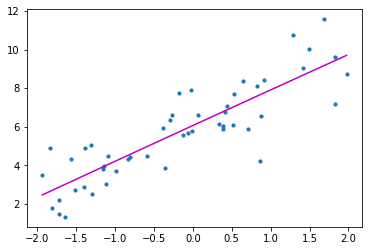

(array([6.06752482]), array([[ 0.        ,  1.84654392, -0.00450628]]))

In [27]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

polyFit(xx, rr, gnDegree=2)

Intercept: 
 [6.06434948]
Coefficients: 
 [[ 0.          1.94587836 -0.00213987 -0.04080889]]


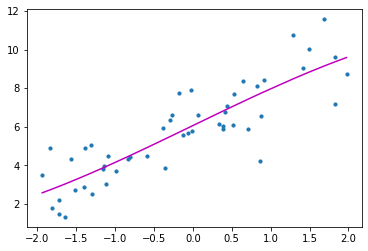

(array([6.06434948]),
 array([[ 0.        ,  1.94587836, -0.00213987, -0.04080889]]))

In [28]:
polyFit(xx, rr, gnDegree=3)

Intercept: 
 [6.25197675]
Coefficients: 
 [[ 0.          0.64981395 -0.8837445   1.55335634  0.78544624 -0.36109765
  -0.15550151]]


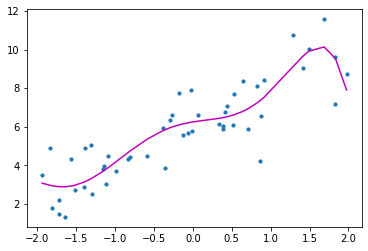

(array([6.25197675]),
 array([[ 0.        ,  0.64981395, -0.8837445 ,  1.55335634,  0.78544624,
         -0.36109765, -0.15550151]]))

In [29]:
polyFit(xx, rr, gnDegree=6)